# Classification on Census Dataset for predicting income >50K or <=50K

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
income=pd.read_csv('adult.csv')

In [3]:
income.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [4]:
income_cat = income['income'].values

In [5]:
income_cat[0]

'<=50K'

In [6]:
grtden50K = []

for val in income_cat:
    if val == '<=50K':
        grtden50K.append(0)
    else:
        grtden50K.append(1)

In [7]:
grtden50K

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [8]:
income = pd.concat([income, pd.DataFrame({'income_cat': grtden50K})], axis=1)

In [9]:
income.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_cat
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K,1


In [10]:
income.drop('income', axis=1, inplace=True)

In [26]:
income.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income_cat
0,90,?,0.043987,HS-grad,9,Widowed,?,Not-in-family,White,Female,0.0,1.000000,0.397959,United-States,0
1,82,Private,0.081896,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,1.000000,0.173469,United-States,0
2,66,?,0.118021,Some-college,10,Widowed,?,Unmarried,Black,Female,0.0,1.000000,0.397959,United-States,0
3,54,Private,0.086982,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,0.895317,0.397959,United-States,0
4,41,Private,0.171404,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0.0,0.895317,0.397959,United-States,0
5,34,Private,0.138941,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0.0,0.865473,0.448980,United-States,0
6,38,Private,0.093938,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0.0,0.865473,0.397959,United-States,0
7,74,State-gov,0.051855,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0.0,0.845500,0.193878,United-States,1
8,68,Federal-gov,0.278268,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.845500,0.397959,United-States,0
9,41,Private,0.039223,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0.0,0.689624,0.602041,?,1


In [12]:
income.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income_cat
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [13]:
income['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

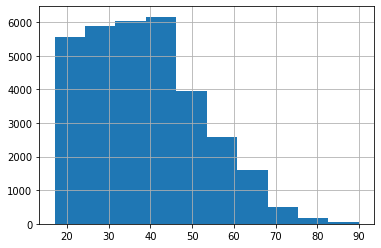

In [14]:
income['age'].hist()

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler(copy = True)

In [17]:
income['fnlwgt']=scaler.fit_transform(income['fnlwgt'].values.reshape(-1,1))
income['capital.gain']=scaler.fit_transform(income['capital.gain'].values.reshape(-1,1))
income['capital.loss']=scaler.fit_transform(income['capital.loss'].values.reshape(-1,1))
income['hours.per.week']=scaler.fit_transform(income['hours.per.week'].values.reshape(-1,1))

In [38]:
income['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [37]:
income['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [20]:
income['education.num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

In [43]:
income['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [32]:
countries = income['native.country'].value_counts().index

In [35]:
countries = list(countries)

In [39]:
len(countries)

42

# Preparing columns

In [40]:
age = tf.feature_column.numeric_column('age')
workclass = tf.feature_column.categorical_column_with_vocabulary_list('workclass', vocabulary_list=['Private', 'Self-emp-not-inc', 'Local-gov', '?', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'])
fnlwgt = tf.feature_column.numeric_column('fnlwgt')
education = tf.feature_column.categorical_column_with_vocabulary_list('education', vocabulary_list=['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th', 'Asoc-acdm', '10th', '7th-8th', 'Prof-School', '9th', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool'])
education_num = tf.feature_column.categorical_column_with_vocabulary_list('education.num', vocabulary_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
marital_status = tf.feature_column.categorical_column_with_vocabulary_list('marital.status', vocabulary_list=['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'])
occupation = tf.feature_column.categorical_column_with_vocabulary_list('occupation', vocabulary_list=['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', '?', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces'])
relationship = tf.feature_column.categorical_column_with_vocabulary_list('relationship', vocabulary_list=['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative'])
race = tf.feature_column.categorical_column_with_vocabulary_list('race', vocabulary_list=['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'])
sex = tf.feature_column.categorical_column_with_vocabulary_list('sex', vocabulary_list=['Male', 'Female'])
capital_gain = tf.feature_column.numeric_column('capital.gain')
capital_loss = tf.feature_column.numeric_column('capital.loss')
hours_per_week = tf.feature_column.numeric_column('hours.per.week')
native_country = tf.feature_column.categorical_column_with_vocabulary_list('native.country', vocabulary_list=countries)
age_bucketed = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])
workclass_emb = tf.feature_column.embedding_column(workclass, dimension= 9)
education_emb = tf.feature_column.embedding_column(education, dimension= 16)
education_num_emb = tf.feature_column.embedding_column(education_num, dimension= 16)
marital_status_emb = tf.feature_column.embedding_column(marital_status, dimension= 7)
occupation_emb = tf.feature_column.embedding_column(occupation, dimension= 15)
relationship_emb = tf.feature_column.embedding_column(relationship, dimension= 6)
race_emb = tf.feature_column.embedding_column(race, dimension= 5)
sex_emb = tf.feature_column.embedding_column(sex, dimension= 2)
native_country_emb = tf.feature_column.embedding_column(native_country, dimension= 42)

In [42]:
lin_feat_cols = [age_bucketed, workclass, fnlwgt, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country]

In [43]:
dnn_feat_cols = [age_bucketed, workclass_emb, fnlwgt, education_emb, education_num_emb, marital_status_emb, occupation_emb, relationship_emb, race_emb, sex_emb, capital_gain, capital_loss, hours_per_week, native_country_emb]

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(income.drop('income_cat', axis = 1), income['income_cat'], test_size= 0.3)

In [47]:
train_input_func = tf.estimator.inputs.pandas_input_fn(x_train, y_train, batch_size=10, num_epochs=2000, shuffle=True)

In [48]:
train_eval_input_func = tf.estimator.inputs.pandas_input_fn(x_train, y_train, batch_size=10, num_epochs=2000, shuffle=False)

In [49]:
test_eval_input_func = tf.estimator.inputs.pandas_input_fn(x_test, y_test, batch_size=10, num_epochs=2000, shuffle=False)

In [50]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x_test, num_epochs=1, shuffle=False)

# LinearClassifier using Estimator

In [51]:
lin_model = tf.estimator.LinearClassifier(feature_columns=lin_feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp96s4frym', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f93634c1d50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [52]:
lin_model.train(train_input_func, steps=2000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp96s4frym/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorflow:global_step/sec: 107.044
I

In [53]:
train_metrics = lin_model.evaluate(input_fn=train_eval_input_func, steps=2000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-19T11:08:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp96s4frym/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [200/2000]
INFO:tensorflow:Evaluation [400/2000]
INFO:tensorflow:Evaluation [600/2000]
INFO:tensorflow:Evaluation [800/2000]
INFO:tensorflow:Evaluation [1000/2000]
INFO:tensorflow:Evaluation [1200/2000]
INFO:tensorflow:Evaluation [1400/2000]
INFO:tensorflow:Evaluation [1600/2000]
INFO:tensorflow:Evaluation [1800/2000]
INFO:tensorflow:Evaluation [2000/2000]
INFO:tensorflow:Finished evaluation at 2019-11-19-11:08:52
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.8461, accuracy_baseline = 0.7596, auc = 0.89999175, auc_precision_recall = 0.7427811, 

In [54]:
train_metrics

{'accuracy': 0.8461,
 'accuracy_baseline': 0.7596,
 'auc': 0.89999175,
 'auc_precision_recall': 0.7427811,
 'average_loss': 0.3332812,
 'label/mean': 0.2404,
 'loss': 3.3328118,
 'precision': 0.69368565,
 'prediction/mean': 0.26511678,
 'recall': 0.6443428,
 'global_step': 2000}

In [55]:
test_metrics = lin_model.evaluate(input_fn=test_eval_input_func, steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-19T11:10:13Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp96s4frym/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [200/2000]
INFO:tensorflow:Evaluation [400/2000]
INFO:tensorflow:Evaluation [600/2000]
INFO:tensorflow:Evaluation [800/2000]
INFO:tensorflow:Evaluation [1000/2000]
INFO:tensorflow:Evaluation [1200/2000]
INFO:tensorflow:Evaluation [1400/2000]
INFO:tensorflow:Evaluation [1600/2000]
INFO:tensorflow:Evaluation [1800/2000]
INFO:tensorflow:Evaluation [2000/2000]
INFO:tensorflow:Finished evaluation at 2019-11-19-11:10:26
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.845, accuracy_baseline = 0.7583, auc = 0.89736485, auc_precision_recall = 0.738332, average_loss = 0.33767655, global_step = 2000, label/mean = 0.2417, loss = 3.376

In [56]:
test_metrics

{'accuracy': 0.845,
 'accuracy_baseline': 0.7583,
 'auc': 0.89736485,
 'auc_precision_recall': 0.738332,
 'average_loss': 0.33767655,
 'label/mean': 0.2417,
 'loss': 3.3767657,
 'precision': 0.6939597,
 'prediction/mean': 0.26609725,
 'recall': 0.6417046,
 'global_step': 2000}

In [57]:
predicted = list(lin_model.predict(pred_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp96s4frym/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [74]:
pred_cat = []

for pred in predicted:
    pred_cat.append(pred['class_ids'][0])

# Error rate:

In [75]:
np.sum(y_test.values.reshape(1,-1)[0] - pred_cat)/len(pred_cat)*100

1.9039819838263896

# DNNClassifier using Estimator

In [76]:
dnn_model = tf.estimator.DNNClassifier([14, 14], dnn_feat_cols, n_classes= 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp3u7zh4ec', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f93017e0e50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [77]:
dnn_model.train(input_fn=train_input_func, steps=2000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp3u7zh4ec/model.ckpt.
INFO:tensorflow:loss = 7.003453, step = 0
INFO:tensorflow:global_step/sec: 118.954
INFO:tensorflow:loss = 3.0419548, step = 100 (0.840 sec)
INFO:tensorflow:global_step/sec: 171.504
INFO:tensorflow:loss = 2.3927767, step = 200 (0.583 sec)
INFO:tensorflow:global_step/sec: 167.046
INFO:tensorflow:loss = 2.471403, step = 300 (0.599 sec)
INFO:tensorflow:global_step/sec: 164.961
INFO:tensorflow:loss = 3.3221755, step = 400 (0.606 sec)
INFO:tensorflow:global_step/sec: 161.174
INFO:tensorflow:loss = 7.506016, step = 500 (0.620 sec)
INFO:tensorflow:global_step/sec: 176.67


In [78]:
train_metrics = dnn_model.evaluate(train_eval_input_func, steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-19T11:32:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3u7zh4ec/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [200/2000]
INFO:tensorflow:Evaluation [400/2000]
INFO:tensorflow:Evaluation [600/2000]
INFO:tensorflow:Evaluation [800/2000]
INFO:tensorflow:Evaluation [1000/2000]
INFO:tensorflow:Evaluation [1200/2000]
INFO:tensorflow:Evaluation [1400/2000]
INFO:tensorflow:Evaluation [1600/2000]
INFO:tensorflow:Evaluation [1800/2000]
INFO:tensorflow:Evaluation [2000/2000]
INFO:tensorflow:Finished evaluation at 2019-11-19-11:33:01
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.84455, accuracy_baseline = 0.7596, auc = 0.89820987, auc_precision_recall = 0.737474, average_loss = 0.33464408, global_step = 2000, label/mean = 0.2404, loss = 3.3

In [80]:
train_metrics

{'accuracy': 0.84455,
 'accuracy_baseline': 0.7596,
 'auc': 0.89820987,
 'auc_precision_recall': 0.737474,
 'average_loss': 0.33464408,
 'label/mean': 0.2404,
 'loss': 3.346441,
 'precision': 0.7212816,
 'prediction/mean': 0.23692353,
 'recall': 0.57591516,
 'global_step': 2000}

In [79]:
test_metrics = dnn_model.evaluate(test_eval_input_func, steps = 2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-19T11:33:56Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3u7zh4ec/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [200/2000]
INFO:tensorflow:Evaluation [400/2000]
INFO:tensorflow:Evaluation [600/2000]
INFO:tensorflow:Evaluation [800/2000]
INFO:tensorflow:Evaluation [1000/2000]
INFO:tensorflow:Evaluation [1200/2000]
INFO:tensorflow:Evaluation [1400/2000]
INFO:tensorflow:Evaluation [1600/2000]
INFO:tensorflow:Evaluation [1800/2000]
INFO:tensorflow:Evaluation [2000/2000]
INFO:tensorflow:Finished evaluation at 2019-11-19-11:34:08
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.84355, accuracy_baseline = 0.7583, auc = 0.8953039, auc_precision_recall = 0.7342026, average_loss = 0.3391517, global_step = 2000, label/mean = 0.2417, loss = 3.39

In [81]:
test_metrics

{'accuracy': 0.84355,
 'accuracy_baseline': 0.7583,
 'auc': 0.8953039,
 'auc_precision_recall': 0.7342026,
 'average_loss': 0.3391517,
 'label/mean': 0.2417,
 'loss': 3.3915172,
 'precision': 0.71797496,
 'prediction/mean': 0.23809229,
 'recall': 0.5808854,
 'global_step': 2000}

In [82]:
predicted = list(dnn_model.predict(pred_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3u7zh4ec/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [83]:
pred_cat = []

for pred in predicted:
    pred_cat.append(pred['class_ids'][0])

# Error rate:

In [84]:
np.sum(y_test.values.reshape(1,-1)[0] - pred_cat)/len(pred_cat)*100

4.6575903367796085